In [70]:
########################################
# importing packages
########################################
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import statsmodels.formula.api as smf # regression modeling

from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.ensemble import GradientBoostingClassifier 

# new libraries
from sklearn.neighbors import KNeighborsClassifer # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer




# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# reading the file into Python
original_df = pd.read_excel(file)


ImportError: cannot import name 'KNeighborsClassifer' from 'sklearn.neighbors' (/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/__init__.py)

we dismantle the email variable to get more information like the customer names or even the gender

In [66]:
original_list = []

for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    original_list.append(split_email)
    

# converting placeholder_lst into a DataFrame 
original_df1 = pd.DataFrame(original_list)

original_df1.columns = ['name','email']

original_df1


,name,email
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


we group the emails in 3 types that is personal, junk and work email..

In [67]:
# concatenating personal_email_domain with friends DataFrame
original_1 = pd.concat([original_df, original_df1],
                   axis = 1)

personal_email = ['@gmail.com','@protonmail.com','@yahoo.com']

junk_email = ['@msn.com','@aol.com','@passport.com','@hotmail.com','@live.com','@me.com']

work_email = ['@amex.com',"@cocacola.com",'@jnj.com','@mcdonalds.com',
             '@merck.com','@nike.com','@apple.com','@ge.org','@dupont.com',
             '@ibm.com','@chevron.com','@microsoft.com','@unitedhealth.com',
             '@exxon.com','@travelers.com','@boeing.com','@pg.com','@caterpillar.com',
             '@verizon.com','@mmm.com','@walmart.com','@disney.com','@pfizer.com',
             '@visa.com','@jpmorgan.com','@cisco.com','@goldmansacs.com',
             '@unitedtech.com','@intel.com','@homedepot.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in original_1['email']:
        if "@" + domain in personal_email:
            placeholder_lst.append('personal')
            
        elif "@"+ domain in work_email:
            placeholder_lst.append('work')
            
        elif "@" + domain in junk_email:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')
            
# concatenating with original DataFrame
original_1['domain_group'] = pd.Series(placeholder_lst)

# One hot encoding categorical variables

one_hot_domain_group = pd.get_dummies(original_1['domain_group'])

# Joining codings together
original_1 = original_1.join([one_hot_domain_group])

# Saving new columns
new_columns = original_1.columns

# checking results
original_1.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'name', 'email', 'domain_group', 'junk', 'personal', 'work'], dtype='object')

In [33]:
original_2 = original_1

print(original_2.isnull().sum())
original_2
original_1.to_excel('original_2.xlsx', index = False)

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

We drop the characters in the dataframe

In [34]:
original_2.drop(['NAME', 'EMAIL','FIRST_NAME','FAMILY_NAME','name','email','domain_group'], axis=1, inplace=True)

In [36]:
original_2.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
MOBILE_LOGINS                   0
PC_LOGINS                       0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
junk                            0
personal                        0
work                            0
dtype: int64

viaulaizing tshe trend of the variables in the histograms to enable us set thresholds

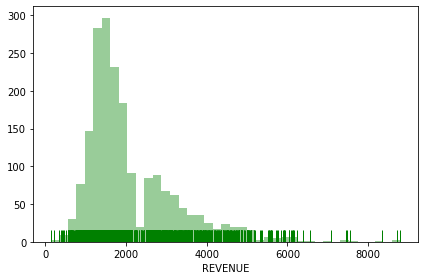

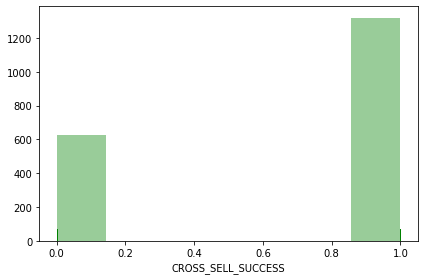

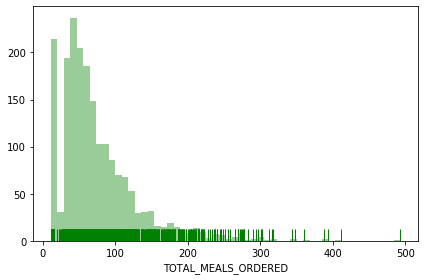

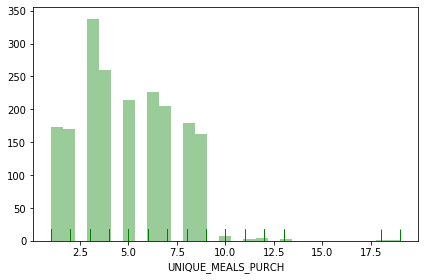

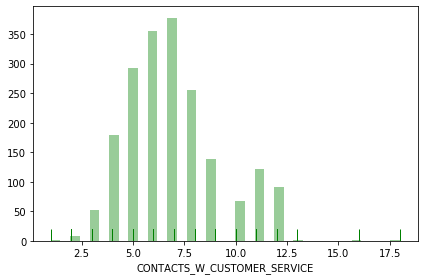

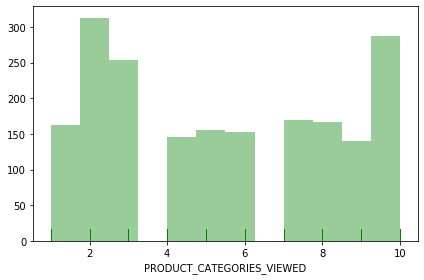

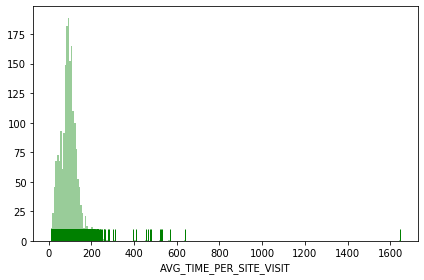

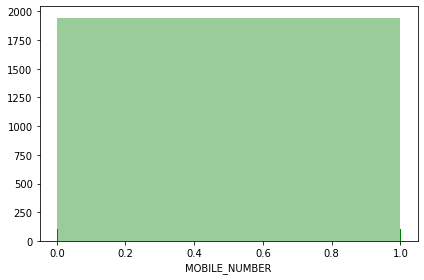

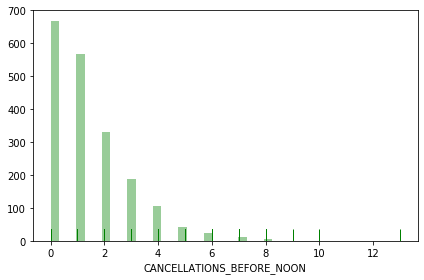

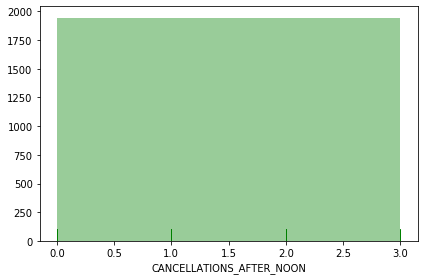

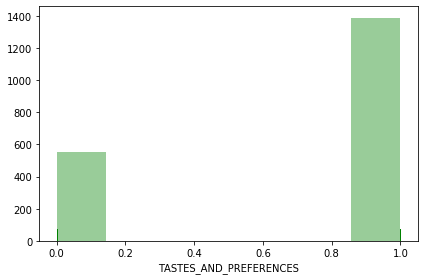

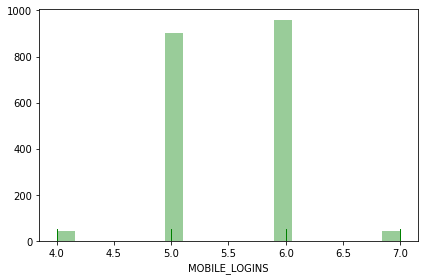

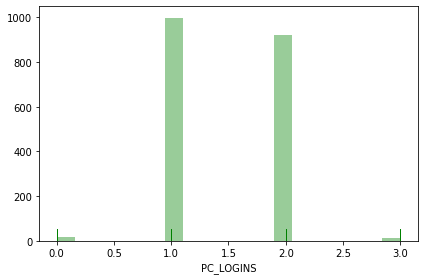

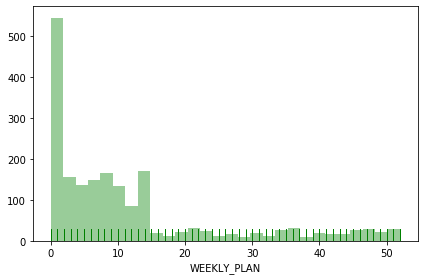

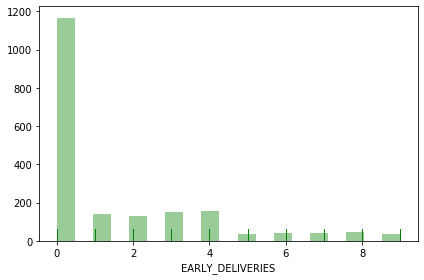

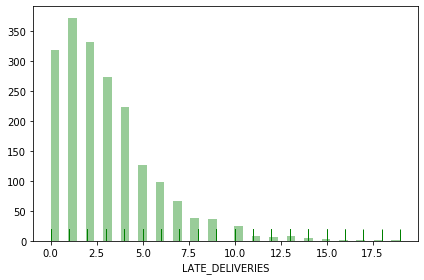

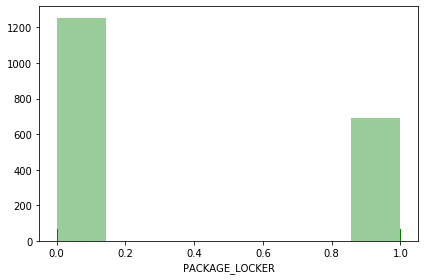

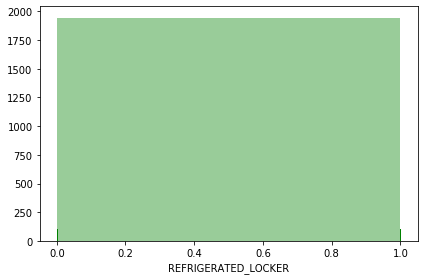

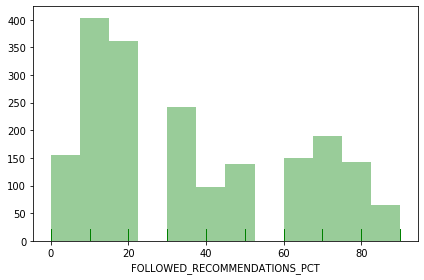

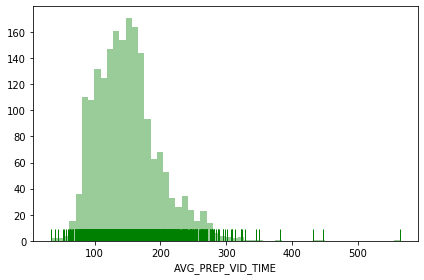

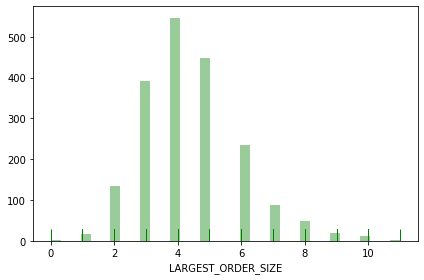

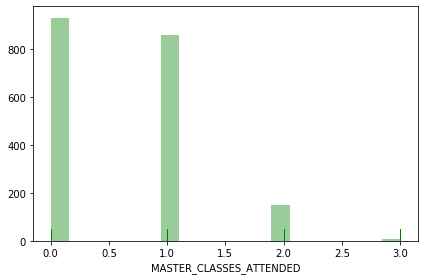

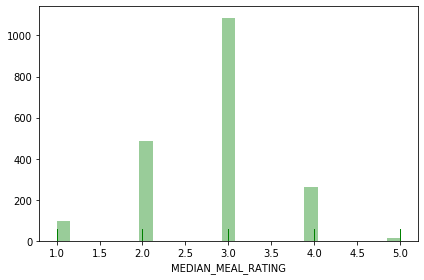

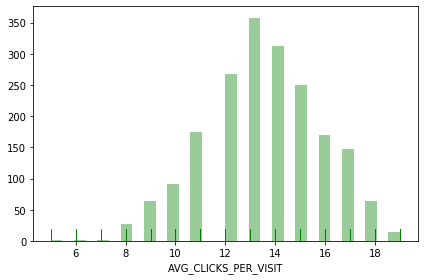

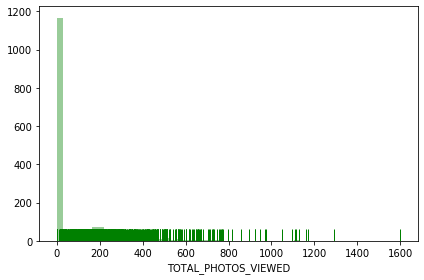

In [37]:
for col in original_2.columns[0:25]:
    sns.distplot(original_2[col],
                 bins='fd',
                 color='g',
                 kde   = False,
                 rug   = True)
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f'Dist_{col}.png')
    plt.show()

In [71]:
org_corr= pd.DataFrame(original_2.iloc[:,0:25].corr())
org_corr.iloc[:,0].sort_values(ascending=False)

REVENUE                         1.000000
AVG_PREP_VID_TIME               0.643580
MEDIAN_MEAL_RATING              0.607873
TOTAL_MEALS_ORDERED             0.600489
TOTAL_PHOTOS_VIEWED             0.465951
MASTER_CLASSES_ATTENDED         0.449015
LARGEST_ORDER_SIZE              0.435201
AVG_TIME_PER_SITE_VISIT         0.144572
CONTACTS_W_CUSTOMER_SERVICE     0.101659
PRODUCT_CATEGORIES_VIEWED       0.034492
MOBILE_NUMBER                   0.031247
MOBILE_LOGINS                   0.016118
CANCELLATIONS_BEFORE_NOON       0.013624
WEEKLY_PLAN                     0.009794
TASTES_AND_PREFERENCES          0.007847
CROSS_SELL_SUCCESS              0.004540
REFRIGERATED_LOCKER            -0.000298
EARLY_DELIVERIES               -0.000933
LATE_DELIVERIES                -0.008583
PACKAGE_LOCKER                 -0.010642
FOLLOWED_RECOMMENDATIONS_PCT   -0.018836
PC_LOGINS                      -0.019172
CANCELLATIONS_AFTER_NOON       -0.036097
UNIQUE_MEALS_PURCH             -0.062788
AVG_CLICKS_PER_V

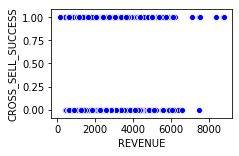

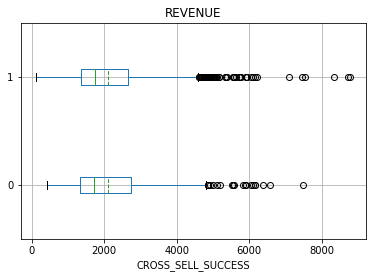

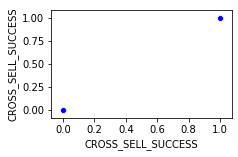

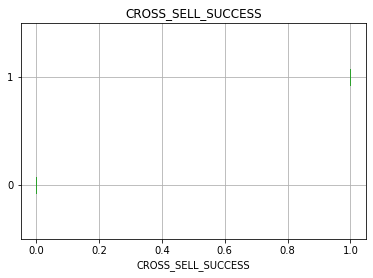

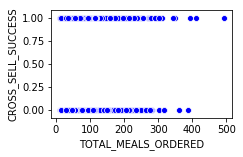

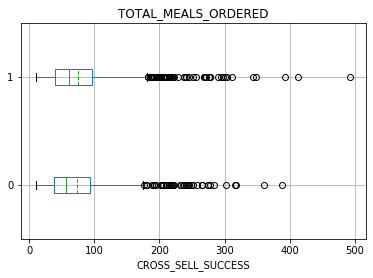

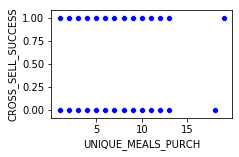

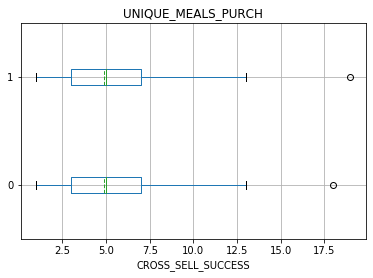

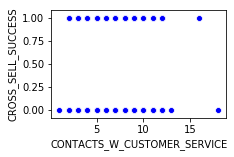

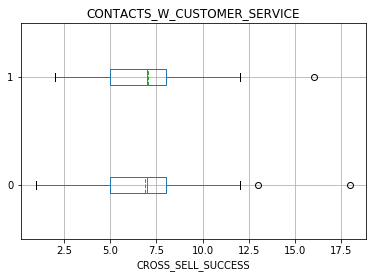

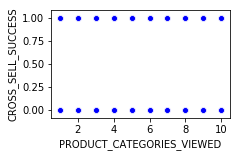

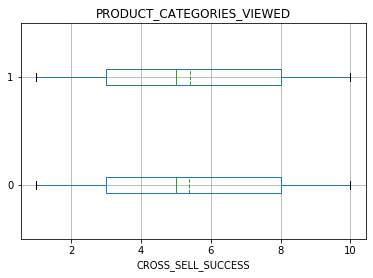

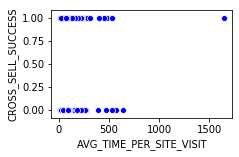

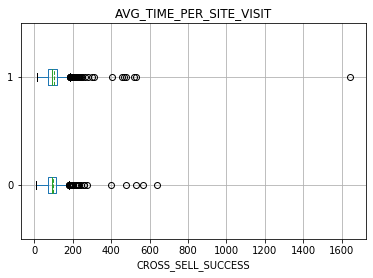

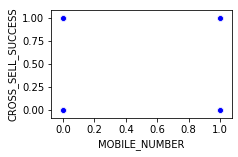

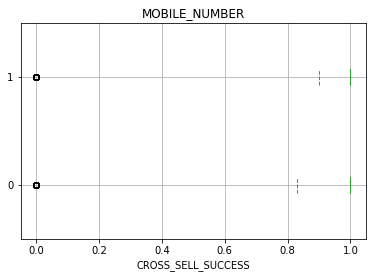

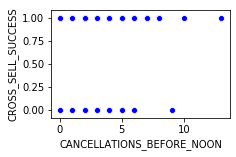

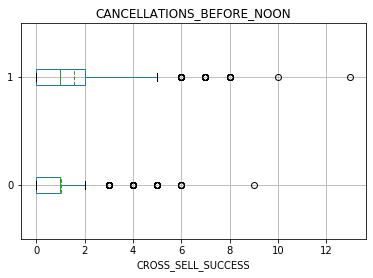

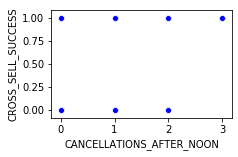

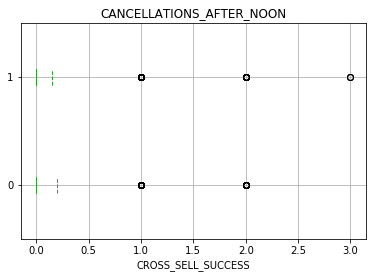

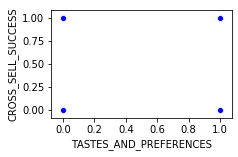

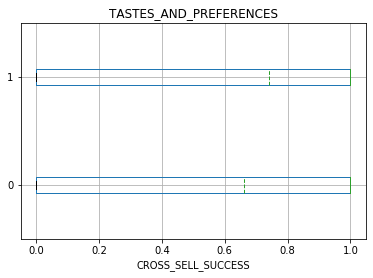

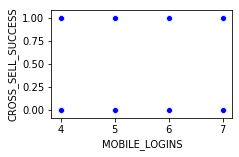

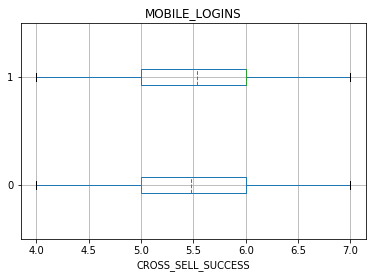

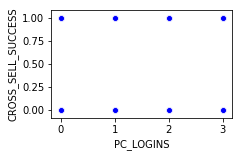

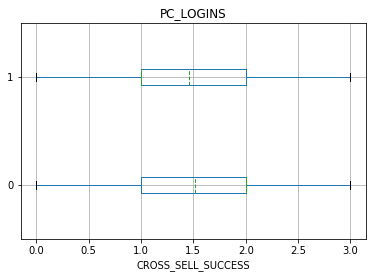

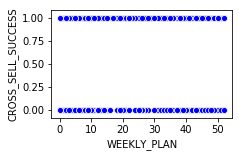

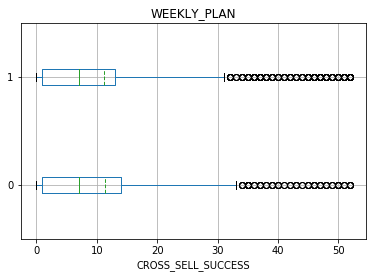

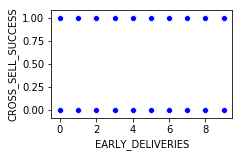

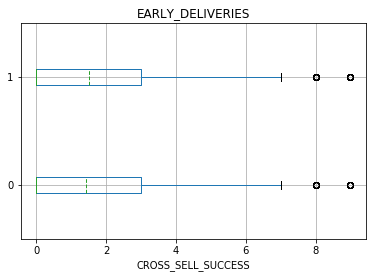

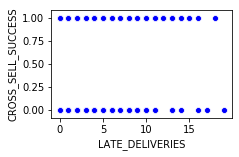

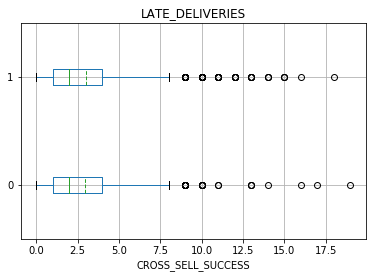

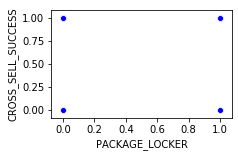

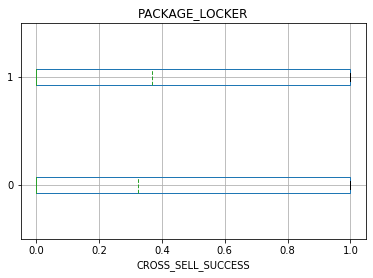

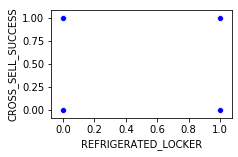

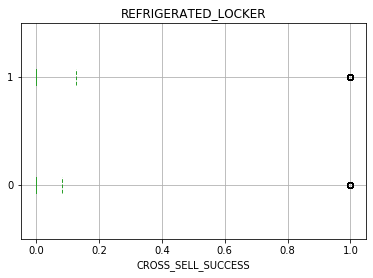

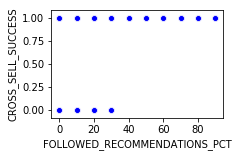

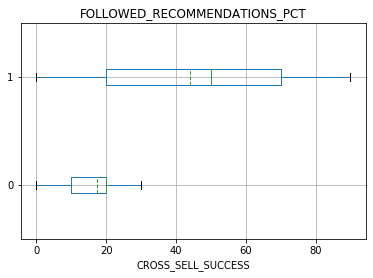

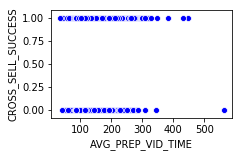

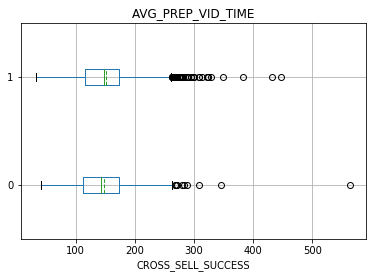

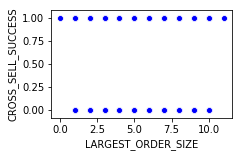

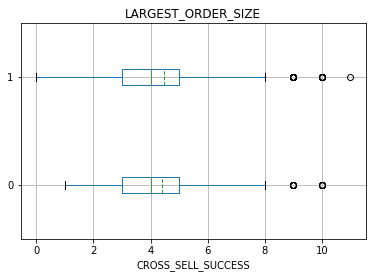

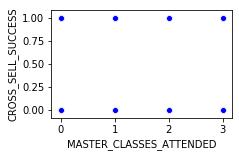

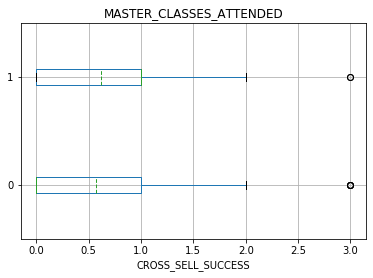

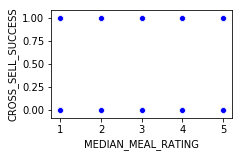

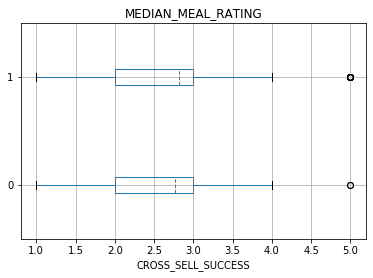

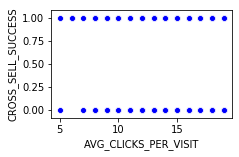

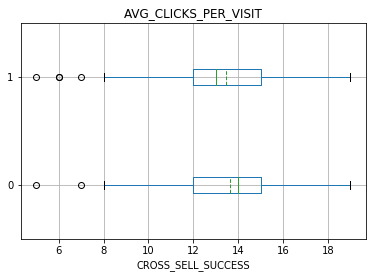

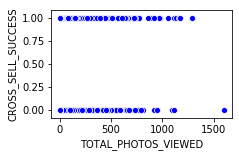

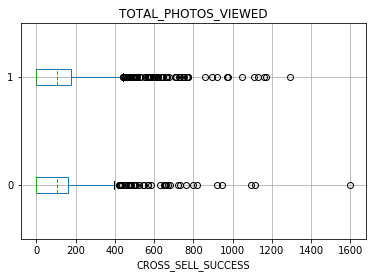

In [75]:
i = 0
for col in original_2.columns[0:25]:
    i += 1
    if (i == 5):
        i = 1
    ax = plt.subplot(2,2,i)
    sns.scatterplot(x = original_2[col],
                y = original_2['CROSS_SELL_SUCCESS'],
                color = 'b')
    plt.xlabel(col)
    #f = plt.figure(figsize=(2, 2))
    #f.add_gridspec(2, 2)
    plt.tight_layout()
    plt.savefig(f'CORR_{col}.png')
    plt.show()
    
    #i += 1
    #if (i == 5):
    #    i = 1
    #ax = plt.subplot(2,2,i)
    #fig1, ax1 = plt.subplots()
    #ax1.set_title('Basic Plot')

    #ax1.boxplot(original_df)
    original_2.boxplot(column 	 = col, by = "CROSS_SELL_SUCCESS",
       	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
               
    plt.suptitle("")
    plt.show()   

               

using the box plot to identify each variable with the predict variable which is cross sell success

In [40]:
REVENUE_hi                         = 70000
CONTACTS_W_CUSTOMER_SERVICE_hi  =    14
UNIQUE_MEALS_PURCH_hi        =    13
AVG_TIME_PER_SITE_VISIT_lo      = 250
TOTAL_MEALS_ORDER_low             = 380
AVG_PREP_VID_TIME_hi            =    350
AVG_CLICKS_PER_VISIT_hi            =  6
CANCELLATIONS_BEFORE_NOON_hi        = 6
#CANCELLATIONS_AFTER_NOON_hi         = 2
LARGEST_ORDER_SIZE_hi           =    10
LARGEST_ORDER_SIZE_lo           =    1.5
LATE_DELIVERIES_hi                 =    12.5
#FOLLOWED_RECOMMENDATION_PCT_HI     = 350
TOTAL_PHOTO_VIEWED_HI               = 1000
         


In [41]:
original_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_2.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][original_2['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
#condition1 = meals.loc[0:,' CONTACTS_W_CUSTOMER_SERVICE'][meals[' CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_hi ]

original_2['CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)


original_2['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_2.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][original_2['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]
#condition1 = meals.loc[0:,'CANCELLATIONS_BEFORE_NOON'][meals['CANCELLATIONS_BEFORE_NOON'] < PRODUCT_CATEGORIES_VIEWED_hi ]

original_2['CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_2['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_2.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][original_2[ 'AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_lo]

original_2['AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


original_2['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition = original_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][original_2['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_hi]
#condition = original_df.loc[0:,'AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_hi]
original_2['AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)

original_2['OUT_UNIQUE_MEALS_PURCH'] = 0
condition = original_2.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][original_2[ 'UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi ]

original_2['UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


#original_2['OUT CANCELLATIONS_AFTER_NOON'] = 0
#condition = original_2.loc[0:,'OUT CANCELLATIONS_AFTER_NOON'][original_2[ 'CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]
#
#original_2['CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
#                                   value      = 1,
#                                   inplace    = True)

original_2['OUT_LATE_DELIVERIES'] = 0
condition = original_2.loc[0:,'OUT_LATE_DELIVERIES'][original_2['LATE_DELIVERIES'] >LATE_DELIVERIES_hi]

original_2['LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


original_2['OUT_AVG_PREP_VID_TIME'] = 0
condition = original_2.loc[0:,'OUT_AVG_PREP_VID_TIME'][original_2['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
#condition1 = meals.loc[0:,'AVG_PREP_VID_TIME'][meals['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_hi ]

original_2['AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



original_2['OUT_LARGEST_ORDER_SIZE'] = 0
condition = original_2.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_2['LARGEST_ORDER_SIZE'] >LARGEST_ORDER_SIZE_lo]
condition = original_2.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_2['LARGEST_ORDER_SIZE'] <LARGEST_ORDER_SIZE_hi]

original_2['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)




original_2['OUT_REVENUE'] = 0
condition = original_2.loc[0:,'OUT_REVENUE'][original_2['REVENUE'] > REVENUE_hi]
#condition = meals.loc[0:,' MEDIAN_MEAL_RATING'][meals[' MEDIAN_MEAL_RATING'] < REVENUE_hi]
original_2['REVENUE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


original_2['OUT_TOTAL_MEALS_ORDERED'] = 0
condition = original_2.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][original_2['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDER_low]
#condition1 = meals.loc[0:,'TOTAL_MEALS_ORDERED'][meals['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDER_hi]

original_2['TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



original_2['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_2.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][original_2['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTO_VIEWED_HI]
#condition1 = meals.loc[0:,'TOTAL_MEALS_ORDERED'][meals['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDER_hi]

original_2['TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)




In [42]:
original_data   = original_2.drop(['CROSS_SELL_SUCCESS'],
                                 axis = 1)
original_target = original_2.loc[:,'CROSS_SELL_SUCCESS']

X_train, X_test, y_train, y_test = train_test_split(
            original_data,
            original_target,
            test_size = 0.33,
            random_state = 802)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1303, 38)
(1303,)
(643, 38)
(643,)


In [43]:
original_data 

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,work,OUT_CONTACTS_W_CUSTOMER_SERVICE,OUT_CANCELLATIONS_BEFORE_NOON,OUT_AVG_TIME_PER_SITE_VISIT,OUT_AVG_CLICKS_PER_VISIT,OUT_UNIQUE_MEALS_PURCH,OUT_LATE_DELIVERIES,OUT_AVG_PREP_VID_TIME,OUT_LARGEST_ORDER_SIZE,OUT_REVENUE,OUT_TOTAL_MEALS_ORDERED,OUT_TOTAL_PHOTOS_VIEWED
0,1880.0,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1495.0,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,2572.5,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1647.0,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1923.0,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1942,1432.0,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1943,623.0,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1944,899.0,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON','MOBILE_LOGINS', 
                   'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES','LATE_DELIVERIES'
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
                   'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','CONTACTS_W_CUSTOMER_SERVICE'],
 
 # significant variables only
    'logit_sig'    : ['REVENUE','AVG_PREP_VID_TIME','TOTAL_MEALS_ORDERED','LARGEST_ORDER_SIZE',
'FOLLOWED_RECOMMENDATIONS_PCT']

}

In [45]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIESPACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'CONTACTS_W_CUSTOMER_SERVICE']


Significant p-value Model:
--------------------------
['REVENUE', 'AVG_PREP_VID_TIME', 'TOTAL_MEALS_ORDERED', 'LARGEST_ORDER_SIZE', 'FOLLOWED_RECOMMENDATIONS_PCT']



In [46]:
original_data   =  original_2[candidate_dict[:,'logit_sig']]
original_target =  original_2[:,'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_data,
            original_target,
            test_size    = 0.25,
            random_state = 803,
            stratify     = original_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_test).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_train).round(4))

TypeError: unhashable type: 'slice'

In [47]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(original_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.0,1946.00,1946.0,1946.0,1946.0
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0
min,-1.74,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-1.33,-2.37,-2.86,-0.94,-2.37,-3.65,-0.59,-0.5,-0.89,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.19,0.0,0.0,0.0
25%,-0.67,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.96,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.5,-0.89,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0
50%,-0.32,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.20,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.5,-0.89,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0
75%,0.49,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.93,0.47,0.36,0.62,0.27,0.64,0.37,-0.5,1.12,1.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0
max,5.88,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,2.05,8.37,4.23,3.73,2.92,2.35,8.25,2.0,1.12,1.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0


In [48]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = original_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(original_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
REVENUE                            1.295040e+06
TOTAL_MEALS_ORDERED                3.057600e+03
UNIQUE_MEALS_PURCH                 6.257663e+00
CONTACTS_W_CUSTOMER_SERVICE        5.201168e+00
PRODUCT_CATEGORIES_VIEWED          9.261178e+00
AVG_TIME_PER_SITE_VISIT            3.884497e+03
MOBILE_NUMBER                      1.073443e-01
CANCELLATIONS_BEFORE_NOON          2.400263e+00
CANCELLATIONS_AFTER_NOON           1.867359e-01
TASTES_AND_PREFERENCES             2.040816e-01
MOBILE_LOGINS                      3.371049e-01
PC_LOGINS                          2.782182e-01
WEEKLY_PLAN                        1.841399e+02
EARLY_DELIVERIES                   5.373137e+00
LATE_DELIVERIES                    7.528947e+00
PACKAGE_LOCKER                     2.290003e-01
REFRIGERATED_LOCKER                1.002716e-01
FOLLOWED_RECOMMENDATIONS_PCT       7.060232e+02
AVG_PREP_VID_TIME                  2.443767e+03
LARGEST_ORDER_SIZE                 2.4042

In [68]:
# determining the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 20


In [69]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(original_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_target,
            random_state = 802,
            test_size = 0.25,
            stratify = original_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

NameError: name 'KNeighborsClassifier' is not defined